In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [93]:
def conv(f,g,x):
    N1 = len(f)
    N2 = len(g)
    result = np.zeros(N1+N2)
    for i in range(N1+N2-1):
        for j in range(N2-1):
            if (i-j>0) and (i-j<N1-1):
                result[i] += f[i-j]*g[j]
    return np.abs(result)

def fast_conv(f,g,x):
    res = np.convolve(f,g,"full")
    return res

In [94]:
def corr(f,g,x):
    N1 = len(f)
    N2 = len(g)
    result = np.zeros(N1+N2)
    for i in range(N1+N2-1):
        for j in range(N2-1):
            if (j+i-N2>0) and (j+i-N2<N1-1):
                result[i] += np.conjugate(f[j+i-N2])*g[j]
    return np.flip(result,0)

def fast_corr(f,g,x):
    fModified = (np.conjugate(np.flip(f,0)))
    res = np.convolve(fModified,g,"full")
    return res

In [95]:
def rect(t):
    result = np.zeros(len(t))
    for i in range(0, len(t)):
        result[i] = t[i] >= -np.abs(t[0])/2 and t[i] <= np.abs(t[0])/2
    return result

def rectNorm(t):
    result = np.zeros(len(t))
    for i in range(0, len(t)):
        result[i] = t[i] >= -1 and t[i] <= 1
    return result

def triangle(x):
    return [max(1-abs(x[i]), 0) for i in range(len(x))]


In [96]:
def draw(f, g, t, t2):
    plt.figure(figsize=(14,8))
    
    plt.subplot(231)
    plt.title("f")
    plt.plot(t, f)
    
    plt.subplot(234)
    plt.title("g")
    plt.plot(t2, g)
    
    plt.subplot(232)
    plt.title("my_conv")
    plt.plot(np.arange(0, (len(t2)+len(t))/10, 0.1), conv(f, g, t2))
    
    plt.subplot(235)
    plt.title("fast_conv")
    plt.plot(np.arange(0.1, (len(t)+len(t2))/10, 0.1), np.abs(fast_conv(f, g, t)))
    
    plt.subplot(233)
    plt.title("corr")
    plt.plot(np.arange(0, (len(t)+len(t2))/10, 0.1), np.abs(corr(f, g, t)))
    
    plt.subplot(236)
    plt.title("fast_corr")
    plt.plot(np.arange(0.1, (len(t)+len(t2))/10, 0.1), np.abs(fast_corr(f, g, t)))


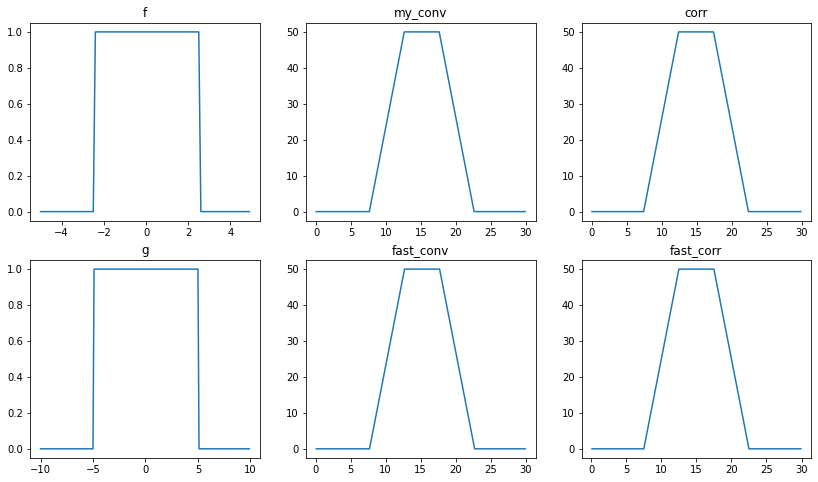

In [97]:
t = np.arange(-5, 5, 0.1)
t2 = np.arange(-10, 10, 0.1)
#diff len
draw(rect(t), rect(t2), t, t2)

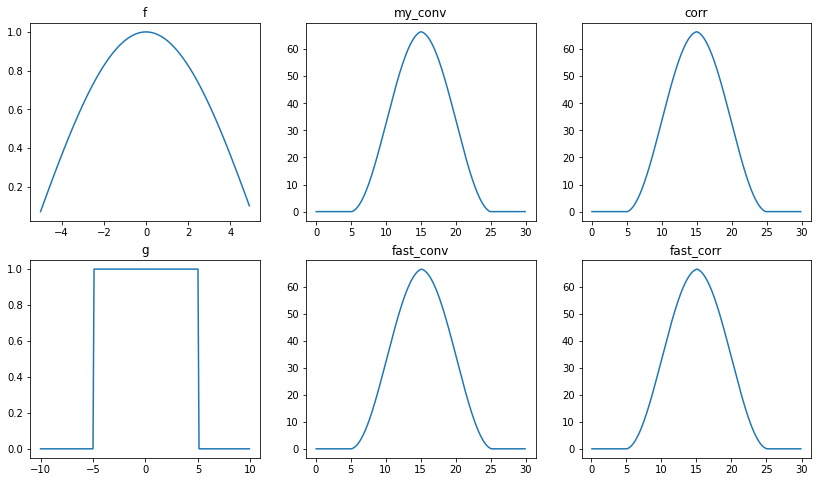

In [98]:
t = np.arange(-5, 5, 0.1)
draw(np.sin(t/4*1.2+np.pi/2), rect(t2), t, t2)

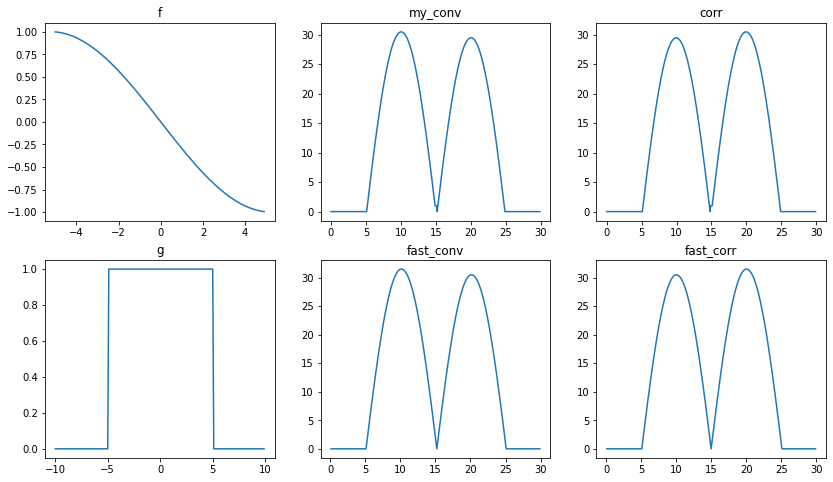

In [99]:
t = np.arange(-5, 5, 0.1)
draw(np.cos(t/4*1.2+np.pi/2), rect(t2), t, t2)

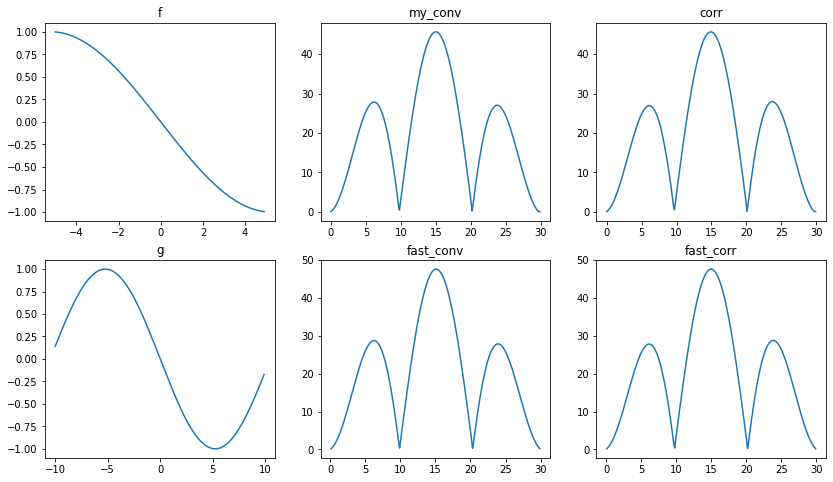

In [100]:
t = np.arange(-5, 5, 0.1)
draw(np.cos(t/4*1.2+np.pi/2), np.cos(t2/4*1.2+np.pi/2), t, t2)

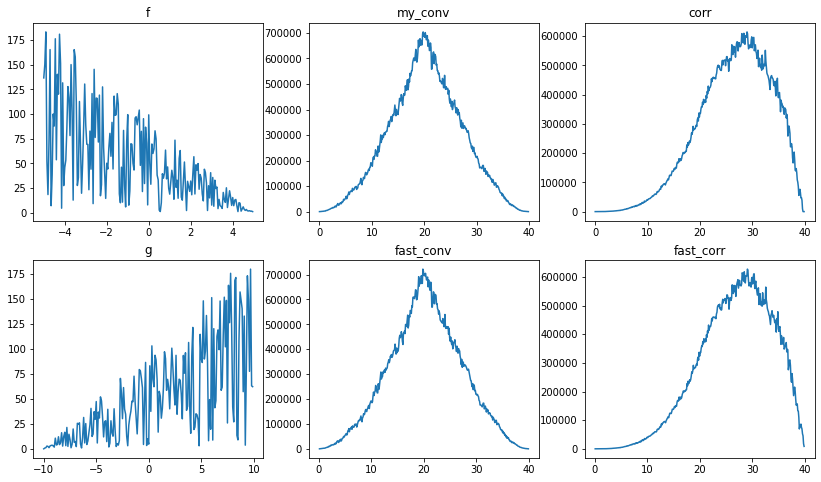

In [101]:
t = np.arange(-5, 5, 0.05)
draw([np.random.uniform(len(t)-i) for i in range(len(t))], [np.random.uniform(i) for i in range(len(t2))], t, t2)